``` py

!pip install takeHomeTest
import takeHomeTest

!pip install time
from time import oneWeek as panic

panic.dump(takeHomeTest)


print("Welcome to your take home final!\n")
```





## ------------------------------------------- The Legend of Python --------------------------------------------
**Lore**

In the Kingdom of Pyrovia, all nations once traded in harmony. But since the Shattering of the Global APIs, the knowledge of currency exchange — locked away in XML scrolls — has scattered across the timelines. These scrolls reside in a mysterious repository known only as floatrates.com.

The High Council of Programmers has summoned you (and only you), young code-wielder, to begin your final trial. It is divided into 2 parts.
* Quest 1 (50xp): Retrieving the scrolls of time - Threading and Json save and parsing
* Quest 2 (50xp): Decipher the scrolls - Perform EDA on the data.

------ ------ ------ ------ Extra credit ------ ------ ------ ------
* Side Quest 1 (10xp*): Lay down seeds for those that follow - create error logs
* Side Quest 2 (10xp*): The Quest of reflection  - Use profiling on your code to fully understand it

*any points over 100% will be rolled over into your final grade.

I may not have time to run all of your code so make sure you very clearly take notes and communicate successes, issues, and lessons learned.
Please stay off Chat GPT and stack overflow (and like). You should have most everything you need in the notes.

--------------------------------------------
# Quest 1 (50 xp): Retrieving the Scrolls of Time
Retrieve historical exchange rate data from floatrates.com for one of the (Ideally randomly pick) 52 available currencies, starting from the first record on May 4, 2011, until the present day.

- You may store the data as-is in XML, or convert it to JSON, you may use the supplied code below as a starter.

- Organize each currency into its own directory.

- Ensure your code is modular, maintainable, and robust against timeouts or malformed entries.

## Notes from the Grand Master
* Threading is your ally. But do not burn out your ally as they have limited resources. You may use the threading or multi-core to parallelize downloads — but mind the server’s load. Around 10 threads is wise.
    - You should have around 5040 queries.

* XML Scrolls is a new and unfamiliar beast. Therefore takeing on this beast will wield 5 extra experience points. You will not be penalized for choosing to use JSON

*  Use the Save. Nothing is worse than losing experience you have already gained. Save the raw XML (or converted JSON) using timestamped (in my example below) files so you do not need to look it up again. Ie. If you put in a start date and your program has already read that data it should not pull that date again. (it would be a good idea to delete your data and run it top to bottom before final submission)

* Design gracefully. Structure your project with clear modules: downloader.py, parser.py, and so on.

* Log your quest progress in your quest book to show the Grand Master what you learned this is very important.


--------------------------------------------

In [ ]:
!pip install xmltodict

In [ ]:
rates = ["EUR", "GBP", "USD", "DZD", "AUD", "BWP", "BND", "CAD", "CLP", "CNY", "COP", "CZK", "DKK", "HUF", "ISK", "INR", "IDR", "ILS", "KZT", "KRW", "KWD", "LYD", "MYR", "MUR", "NPR", "NZD", "NOK", "OMR", "PKR", "PLN", "QAR", "RUB", "SAR", "SGD", "ZAR", "LKR", "SEK", "CHF", "THB", "TTD"]
ratesForBase = [r for r in rates if r != "USD" and r != "EUR" and r != "GBP"]

In [30]:
import requests
import random
from datetime import datetime, timedelta
import os
import threading
from concurrent.futures import ThreadPoolExecutor
import xmltodict
import json


startDate = datetime(2025,5,4).date()
today = datetime.utcnow().date()
base = random.choice(ratesForBase)
OUTPUT_DIR = f"data/{base}"
lock = threading.Lock()


def fetch_and_save(date):
    date_str = date.strftime("%Y-%m-%d")
    url = (
        f"https://www.floatrates.com/historical-exchange-rates.html"
        f"?operation=rates&pb_id=1775&page=historical"
        f"&currency_date={date_str}&base_currency_code={base}"
        f"&format_type=xml"
    )
    r = requests.get(url, timeout=10)
    r.raise_for_status()
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    path = os.path.join(OUTPUT_DIR, f"{date_str}_{base}.json")

    data_dict = xmltodict.parse(r.text)
    json_data = json.dumps(data_dict, indent=4)


    # only write if new
    if not os.path.exists(path):
        with lock, open(path, "w") as f:
            f.write(json_data)
    return date_str

# build list of all dates
dates = [startDate + timedelta(days=i)
         for i in range((today-startDate).days+1)]

with ThreadPoolExecutor(max_workers=10) as exe:
    for d in exe.map(fetch_and_save, dates):
        print("Saved", d)



{
    "channel": {
        "title": "XML Historical Foreign Exchange Rates for Swiss Franc (CHF) (12 May 2025)",
        "link": "http://www.floatrates.com/currency/chf/",
        "xmlLink": "http://www.floatrates.com/daily/chf.xml",
        "description": "XML historical foreign exchange rates for Swiss Franc (CHF) from the Float Rates. Published at 12 May 2025.",
        "language": "en",
        "baseCurrency": "CHF",
        "pubDate": "Mon, 12 May 2025",
        "lastBuildDate": "Mon, 12 May 2025",
        "item": [
            {
                "title": "1 CHF = 1.857636 AUD",
                "link": "http://www.floatrates.com/chf/aud/",
                "description": "1 Swiss Franc = 1.857636 Australian Dollar",
                "pubDate": null,
                "baseCurrency": "CHF",
                "baseName": "Swiss Franc",
                "targetCurrency": "AUD",
                "targetName": "Australian Dollar",
                "exchangeRate": "1.857636",
                "inv

--------------------------------------------
# Quest 2 (50 XP): Decipher the scrolls – Exploratory Data Analysis

Once the scrolls have been retrieved their knowledge remains unrefined there patterns hidden, trends veiled. Your task now is to become the Seer of Exchange, the one who can read the currencies’ fates through the lens of data.
8
Perform Exploratory Data Analysis (EDA) on the dataset you collected in Quest 1.
- Aggregate and visualize trends in exchange rate over time for at least 5 major currencies (e.g., USD, EUR, GBP, JPY, CNY).

- Identify periods of volatility — perhaps during economic upheaval

- Generate at least multiple visualizations using seaborn:

- Log your quest progress in your quest book to show the Grand Master what you learned this is very important. some examples of observations are:
    - Anomalies, seasonal patterns, or economic events
    - Currencies with the most/least stability
    - Any interesting correlations between currencies


## Notes from the Grand Master
- All of your work in this section should be in your jupyter notebook.

- It might be helpful to use  google to reveal how economic events affected currency. Use Google News or economic calendars to correlate real-world events to exchange rate spikes or dips.


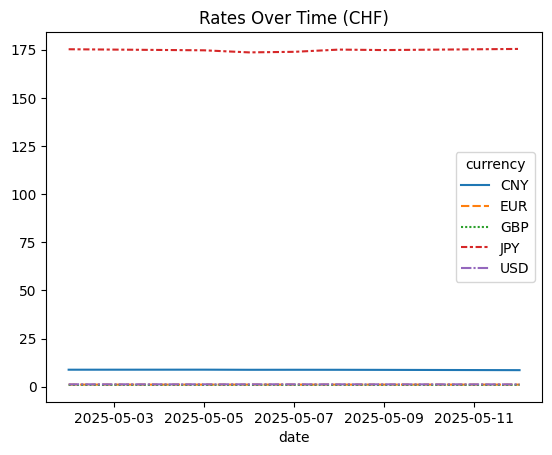

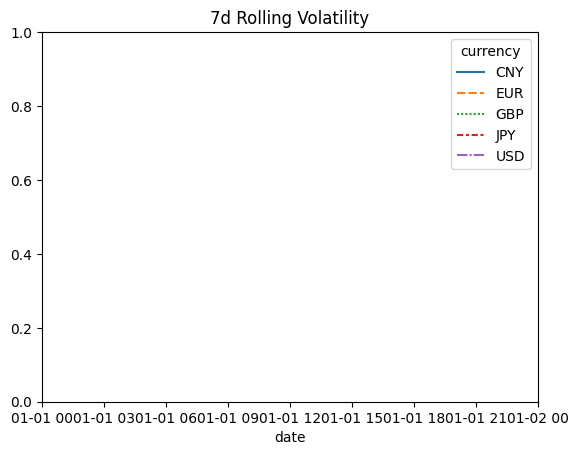

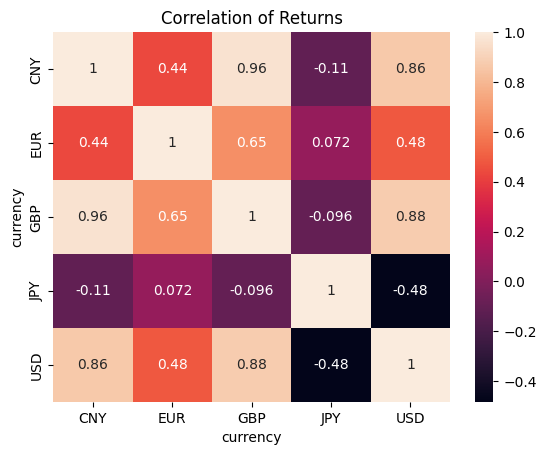

In [ ]:
import json, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from glob import glob

# load & flatten
files = glob("data/CHF/*.json")
base  = json.load(open(files[0]))["channel"]["baseCurrency"]

records  = []
for f in files:
    ch    = json.load(open(f))["channel"]
    date  = pd.to_datetime(ch["pubDate"].split(",")[-1].strip())
    items = ch["item"] if isinstance(ch["item"], list) else [ch["item"]]
    records += [
        (date, it["targetCurrency"], float(it["exchangeRate"].replace(",", "")))
        for it in items if it["targetCurrency"] in ["USD","EUR","GBP","JPY","CNY"]
    ]

# pivot
df = pd.DataFrame(records, columns=["date","currency","rate"]) \
       .pivot_table(index="date", columns="currency", values="rate", aggfunc="mean")

# 1) trend
sns.lineplot(data=df)
plt.title(f"Rates Over Time ({base})")
plt.show()

# 2) volatility
ret = df.pct_change()
sns.lineplot(data=ret.rolling(365).std())
plt.title("7d Rolling Volatility")
plt.show()

# 3) correlation
sns.heatmap(ret.corr(), annot=True)
plt.title("Correlation of Returns")
plt.show()

# log observations to TXT
lines = []
lines.append(f"base currency: {base}\n")
lines.append(f"least volatile: {most_stable} (o={vol[most_stable]:.4f})")
lines.append(f"Most volatile: {most_stable} (o={vol[least_stable]:.4f}")
lines.append("correlations:")
lines.append(f"Highest: {max_a} & {max_b} = {max_corr:.2f}")
lines.append(f"Lowest: {max_a} & {max_b} = {max_corr:.2f}\n")
with open("quest_observations.txt", "w") as f:
    f.write("\n".join(lines)) 


--------------------------------------------


# Side Quest 1 (10 XP): Lay Down Seeds for Those Who Follow – Logging

Even the greatest explorer must leave breadcrumbs for those who walk the path after them. Here you will construct an error log system, a journal that captures both triumphs and catastrophes.

Implement a robust logging system throughout your codebase to monitor:
- Successful currency downloads
- Parsing attempts and failures
- Skipped downloads (due to saved data or time out)
- Connection errors

## Notes from the Grand Master
- You do not need to do log hierarchy
- Use log levels: INFO for progress, WARNING for skips, ERROR for failures



--------------------------------------------


# Side Quest 2 (10 XP): The quest of Reflection – Code Profiling

The final challenge for any Adventure is introspection — learning the nature of one's own power. In this side quest, you will profile your code, to discover its bottlenecks, inefficiencies, and optimization opportunities.

Use profiling tools to evaluate:
- Which functions are taking the most time
- How threads/processes are behaving
- Whether I/O is a bottleneck

*A random vendor appears* His invintory shows:
- A Profiler function - cProfile or Profile
- A time module - timeit for micro-benchmarks
- A line profiler - line_profiler